In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from PyEMD import EEMD

# Load your EMG signal
data = np.genfromtxt("Reposo.txt", delimiter="\t", skip_header=2)
vals = data[:, -2]  # Assuming the EMG data is in the last column
vals=(((vals/(2^10))-1/2)*3.3)/(1009)

In [62]:
import numpy as np
import pywt

def calculate_snr(signal, noise):
    """
    Calculate the Signal-to-Noise Ratio (SNR).
    SNR = 10 * log10(P_signal / P_noise)
    where P_signal is the power of the signal, and P_noise is the power of the noise.
    """
    power_signal = np.sum(signal ** 2) / len(signal)
    power_noise = np.sum(noise ** 2) / len(noise)
    snr = 10 * np.log10(power_signal / power_noise)
    return snr

def is_mostly_noise(coefficients, snr_threshold=10):
    """
    Determine if the coefficients mostly represent noise based on SNR.
    """
    # Assuming the noise is the deviation from the mean
    noise = coefficients - np.mean(coefficients)
    signal = coefficients
    snr = calculate_snr(signal, noise)
    return snr < snr_threshold

def determine_optimal_decomposition_level(signal, wavelet='sym8', snr_threshold=10):
    """
    Determine the optimal level of wavelet decomposition for denoising using SNR.
    """
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet))
    data = signal.copy()

    for level in range(1, max_level + 1):
        # Perform DWT
        coeffs = pywt.wavedec(data, wavelet, level=level)
        # We test the detail coefficients of the highest frequency at this level
        # which are the first element of the list `coeffs[1]`.
        if not is_mostly_noise(coeffs[1], snr_threshold):
            # If not mostly noise, return the previous level
            return level - 1

    return max_level  # In case all levels seem to be white noise based on SNR threshold

# Example usage
signal = vals  # Adding a sine wave to random noise
optimal_level = determine_optimal_decomposition_level(signal)
print(f"Optimal decomposition level: {optimal_level}")

Optimal decomposition level: 9


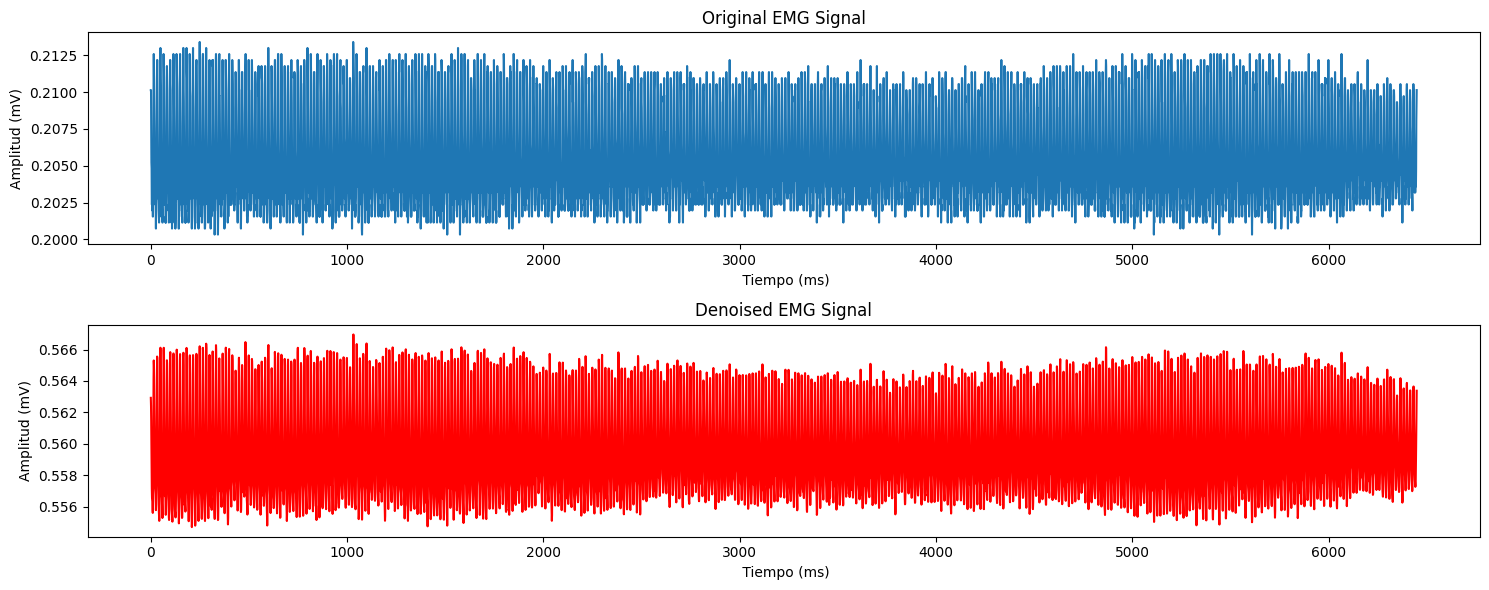

In [49]:
# EEMD Decomposition
eemd = EEMD()
IMFs = eemd.eemd(vals)
nIMFs = IMFs.shape[0]

# Initialize reconstructed signal
reconstructed_signal = np.zeros_like(vals)

# Process each IMF for denoising
for imf in IMFs:
    coeffs = pywt.wavedec(imf, 'sym8', level=optimal_level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(imf)))
    filtered_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    filtered_imf = pywt.waverec(filtered_coeffs, 'sym8')
    reconstructed_signal += filtered_imf

# Plot the original and reconstructed signals
plt.figure(figsize=(15, 6))
plt.subplot(211)
plt.plot(vals, label='Original EMG Signal')
plt.title('Original EMG Signal')
plt.xlabel(" Tiempo (ms)")
plt.ylabel("Amplitud (mV)")

plt.subplot(212)
plt.plot(reconstructed_signal, label='Denoised EMG Signal', color='red')
plt.title('Denoised EMG Signal')
plt.xlabel(" Tiempo (ms)")
plt.ylabel("Amplitud (mV)")
plt.tight_layout()
plt.show()

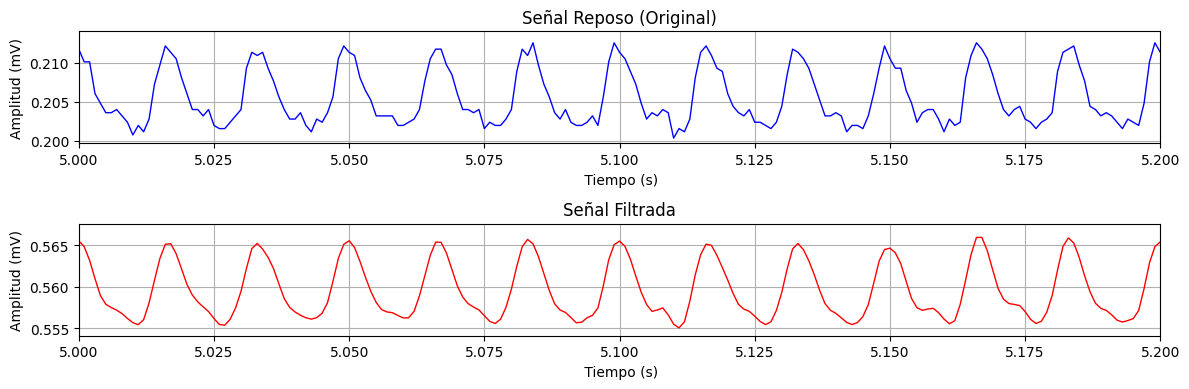

In [50]:
#Debido a que la señal comienza en 4 segundos aproximadamente, se corta la señal en ese punto
Fs=1000#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
time = np.arange(0,len(vals))/Fs


# The commented values are for Reposo, Oposición and Tensión for each column respectively
start_time= 5 #5 #12 #5
plotting_window = 0.2 #0.2 #1 #1

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(time, vals, lw=1, color='blue')
# plt.xlabel('Tiempo (s)')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Reposo (Original)')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)


plt.subplot(2, 1, 2)
plt.plot(time, reconstructed_signal, lw=1, color='red')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Filtrada')
plt.grid(True)

plt.xlim(start_time, start_time + plotting_window)
plt.tight_layout()
plt.savefig("SeñalReposo.png")
plt.show()

# Señal Tensión

In [51]:
# Load your EMG signal
data = np.genfromtxt("Tensión.txt", delimiter="\t", skip_header=2)
vals = data[:, -2]  # Assuming the EMG data is in the last column
vals=(((vals/(2^10))-1/2)*3.3)/(1009)

In [52]:
# Example usage
signal = vals  # Adding a sine wave to random noise
optimal_level = determine_optimal_decomposition_level(signal)
print(f"Optimal decomposition level: {optimal_level}")

Optimal decomposition level: 10


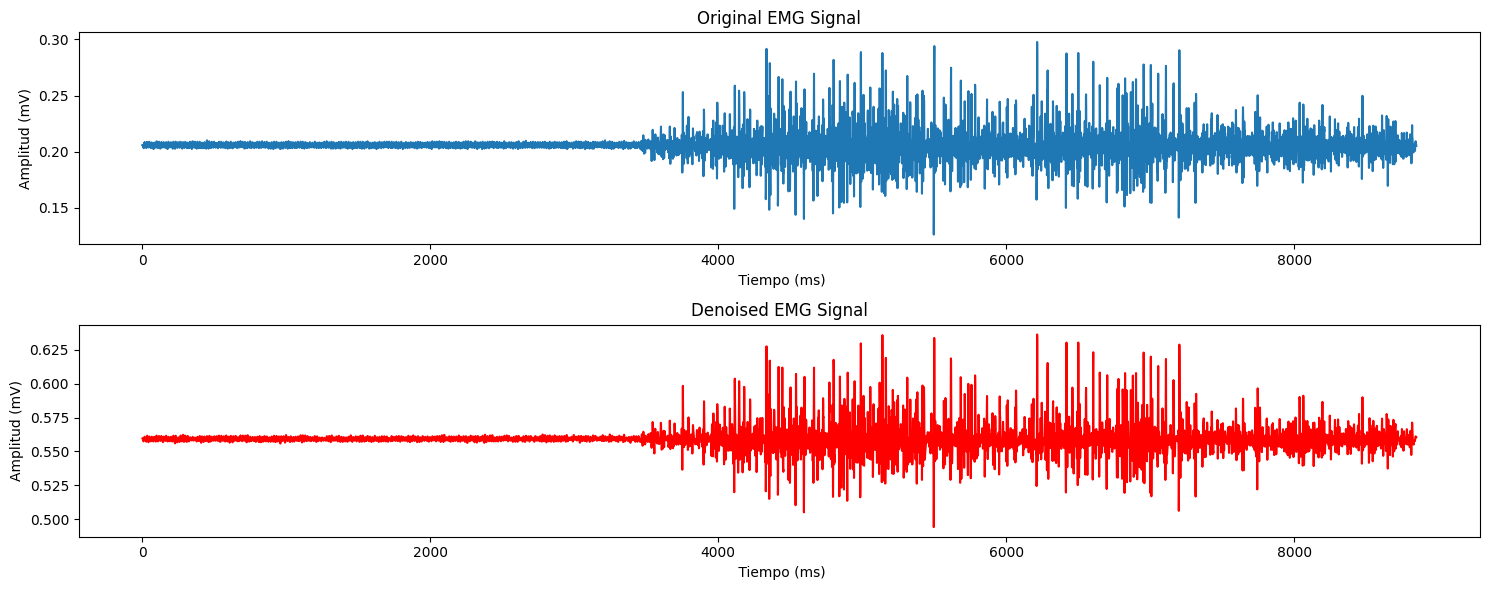

In [53]:
# EEMD Decomposition
eemd = EEMD()
IMFs = eemd.eemd(vals)
nIMFs = IMFs.shape[0]

# Initialize reconstructed signal
reconstructed_signal = np.zeros_like(vals)

# Process each IMF for denoising
for imf in IMFs:
    coeffs = pywt.wavedec(imf, 'sym8', level=optimal_level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(imf)))
    filtered_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    filtered_imf = pywt.waverec(filtered_coeffs, 'sym8')
    reconstructed_signal += filtered_imf

# Plot the original and reconstructed signals
plt.figure(figsize=(15, 6))
plt.subplot(211)
plt.plot(vals, label='Original EMG Signal')
plt.title('Original EMG Signal')
plt.xlabel(" Tiempo (ms)")
plt.ylabel("Amplitud (mV)")

plt.subplot(212)
plt.plot(reconstructed_signal, label='Denoised EMG Signal', color='red')
plt.title('Denoised EMG Signal')
plt.xlabel(" Tiempo (ms)")
plt.ylabel("Amplitud (mV)")
plt.tight_layout()
plt.show()

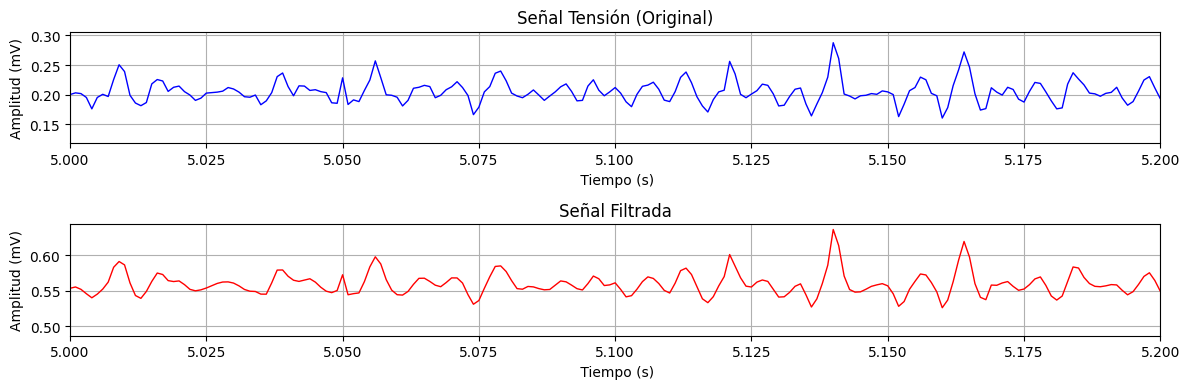

In [54]:
#Debido a que la señal comienza en 4 segundos aproximadamente, se corta la señal en ese punto
Fs=1000#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
time = np.arange(0,len(vals))/Fs


# The commented values are for Reposo, Oposición and Tensión for each column respectively
start_time= 5 #5 #12 #5
plotting_window = 0.2 #0.2 #1 #1

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(time, vals, lw=1, color='blue')
# plt.xlabel('Tiempo (s)')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Tensión (Original)')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)


plt.subplot(2, 1, 2)
plt.plot(time, reconstructed_signal, lw=1, color='red')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Filtrada')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)
plt.tight_layout()
plt.savefig("SeñalTensión.png")
plt.show()

# Señal Oposición

In [55]:
# Load your EMG signal
data = np.genfromtxt("Oposición.txt", delimiter="\t", skip_header=2)
vals = data[:, -2]  # Assuming the EMG data is in the last column
vals=(((vals/(2^10))-1/2)*3.3)/(1009)

In [56]:
# Example usage
signal = vals  # Adding a sine wave to random noise
optimal_level = determine_optimal_decomposition_level(signal)
print(f"Optimal decomposition level: {optimal_level}")

Optimal decomposition level: 11


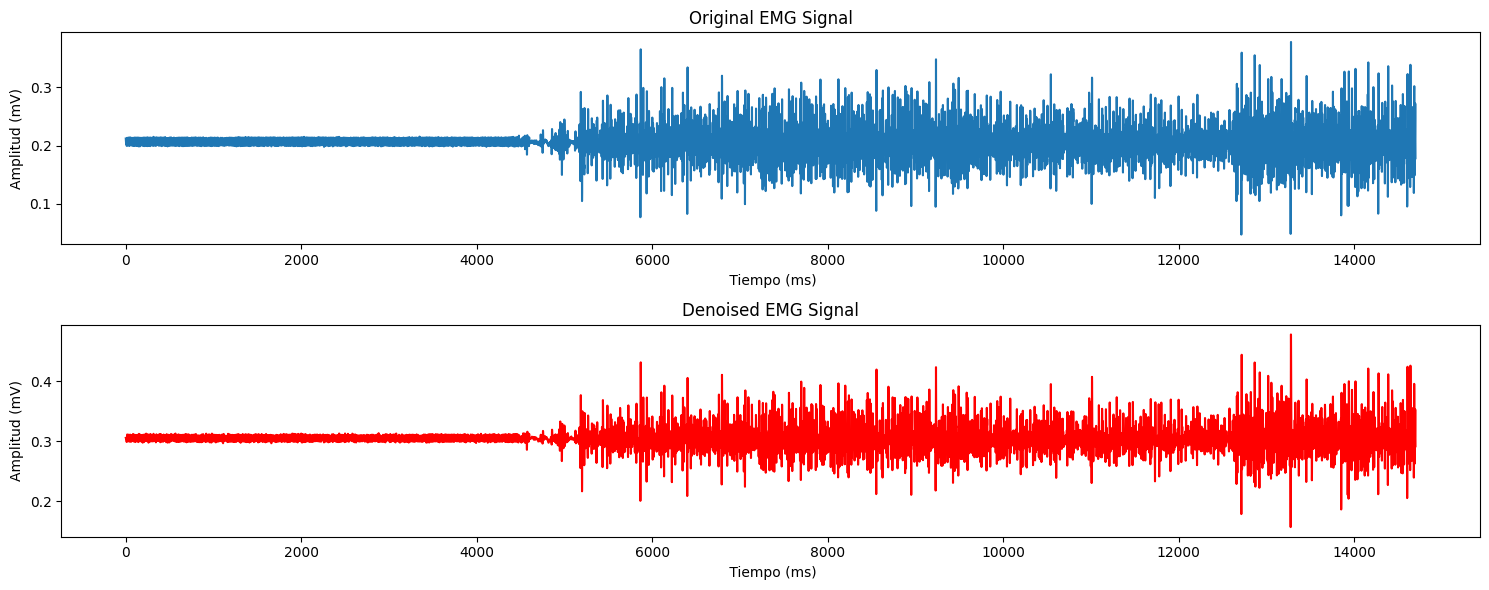

In [57]:
# EEMD Decomposition
eemd = EEMD()
IMFs = eemd.eemd(vals)
nIMFs = IMFs.shape[0]

# Initialize reconstructed signal
reconstructed_signal = np.zeros_like(vals)

# Process each IMF for denoising
for imf in IMFs:
    coeffs = pywt.wavedec(imf, 'sym8', level=optimal_level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(imf)))
    filtered_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    filtered_imf = pywt.waverec(filtered_coeffs, 'sym8')
    reconstructed_signal += filtered_imf

# Plot the original and reconstructed signals
plt.figure(figsize=(15, 6))
plt.subplot(211)
plt.plot(vals, label='Original EMG Signal')
plt.title('Original EMG Signal')
plt.xlabel(" Tiempo (ms)")
plt.ylabel("Amplitud (mV)")

plt.subplot(212)
plt.plot(reconstructed_signal, label='Denoised EMG Signal', color='red')
plt.title('Denoised EMG Signal')
plt.xlabel(" Tiempo (ms)")
plt.ylabel("Amplitud (mV)")
plt.tight_layout()

plt.show()

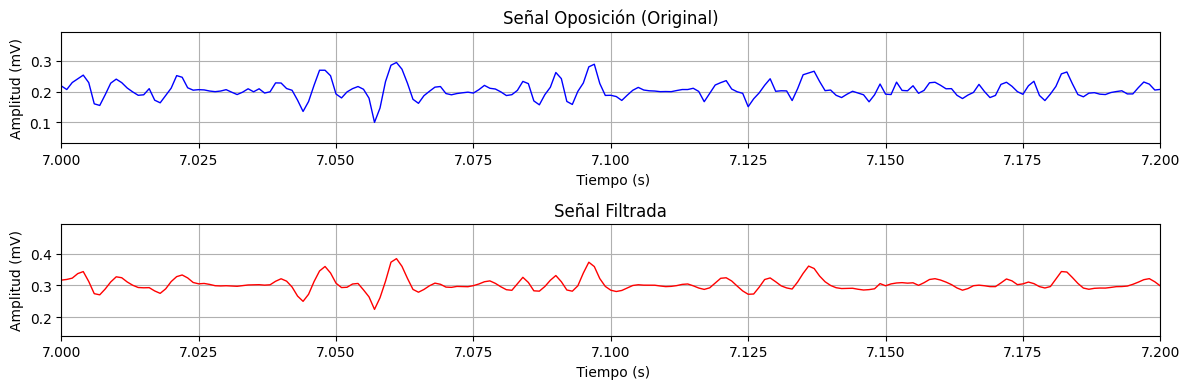

In [61]:
#Debido a que la señal comienza en 4 segundos aproximadamente, se corta la señal en ese punto
Fs=1000#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
time = np.arange(0,len(vals))/Fs


# The commented values are for Reposo, Oposición and Tensión for each column respectively
start_time= 7
plotting_window = 0.2 #0.2 #1 #1

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(time, vals, lw=1, color='blue')
# plt.xlabel('Tiempo (s)')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Oposición (Original)')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)


plt.subplot(2, 1, 2)
plt.plot(time, reconstructed_signal, lw=1, color='red')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Filtrada')
plt.grid(True)
# plt.savefig("SeñalReposo.png")
plt.xlim(start_time, start_time + plotting_window)
plt.tight_layout()
plt.savefig("SeñalOposición.png")
plt.show()